## Observations and Insights 

A study was done to gauge the effectiveness of Pymaceutical's Capomulin treatment on mouse tumors. Data was collected on ten treatments: Ramicane, Capomulin, Infubinol, Placebo, Ceftamin, Stelasyn, Zoniferol, Ketapril, Propriva, and Naftisol.


Data Insights:
- The weight and average tumor size have a strong positive relationship for mouse taking Capomulin. Therefore, as the weight of the mouse increases, the average tumor size increases.
- The treatment Ramicane was found to have the greatest decrease in tumor size while Capomulin is a very close second. Ramicane was found to have the smallest average tumor volume 0f 40.22 mm3. 
- The data for ramicane has a normal distribution with almost equivalent mean (40.216745) and median values (40.673236). In addition, ramicane data had the smallest standard error of mean (SEM) which was 0.320955. Capomulin results were fairly similar to the Ramicane treatment with a mean of 40.675741, median of 41.557809, and SEM of 0.329346. Therefore, the sample mean value has higher accuracy and is a better representation of the population mean compared to the other treatments.
- The standard deviation and variance for Capomulin was lower compared to other treatments excluding Ramicane. Thus, Capomulin effects were more consistent among the mouse being treated. 

Based on the data insights discovered, the new treatment Capomulin performs well compared to the majority of the other treatments and is comparable to Ramicane.

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
combine_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
combine_data['Mouse ID'].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = combine_data
dup_mouse['Duplicated'] = combine_data[['Mouse ID', 'Timepoint']].duplicated()

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_only = dup_mouse.loc[dup_mouse['Duplicated'] == True, :]


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = dup_mouse.loc[dup_mouse['Duplicated'] == False, :]
clean_df['Duplicated'].value_counts()

False    1888
Name: Duplicated, dtype: int64

In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].value_counts()

k403    10
o287    10
j755    10
j984    10
k210    10
        ..
f932     1
v199     1
t573     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grp_df = clean_df.groupby('Drug Regimen')

In [9]:
mean_df = grp_df['Tumor Volume (mm3)'].mean()
mean_df

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [10]:
median_df = grp_df['Tumor Volume (mm3)'].median()
median_df

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [11]:
var_df = grp_df['Tumor Volume (mm3)'].var()
var_df

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [12]:
std_df = grp_df['Tumor Volume (mm3)'].std()
std_df

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# Get all unique drug regimen values
regimen = std_df.index.values
regimen

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

In [14]:

sem_df = [st.sem(clean_df.loc[clean_df['Drug Regimen'] == x, 'Tumor Volume (mm3)']) for x in regimen]
sem_df

[0.3293456234008309,
 0.46982053275261093,
 0.4922356938011383,
 0.6038598237739697,
 0.5964657512424235,
 0.5813305510593877,
 0.5258619511360096,
 0.3209546065084817,
 0.5731109332771458,
 0.5163978968332169]

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = pd.merge(mean_df, median_df, on='Drug Regimen', suffixes=(' Mean', ' Median'))
summary_statistics = pd.merge(summary_statistics, var_df, on='Drug Regimen')
summary_statistics = pd.merge(summary_statistics, std_df, on='Drug Regimen', suffixes=(' Variance', ' Standard Deviation'))
summary_statistics['SEM'] = sem_df
summary_statistics


,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = grp_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 0.98, 'Plot using Pandas')

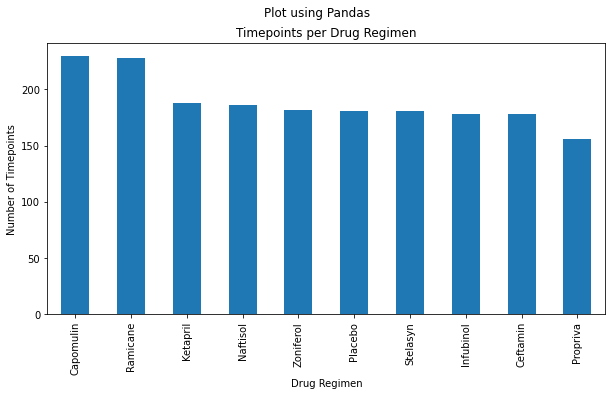

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
time_df = clean_df['Drug Regimen'].value_counts()
time_df.plot(kind='bar', figsize=(10, 5), title='Timepoints per Drug Regimen', xlabel='Drug Regimen', ylabel='Number of Timepoints')
plt.suptitle('Plot using Pandas')

Text(0, 0.5, 'Number of Timepoints')

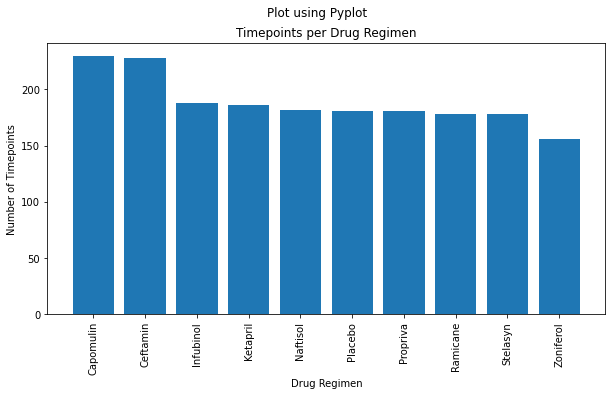

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
regimen_index = np.arange(len(time_df))
tick_loc = [value for value in regimen_index]
plt.figure(figsize=(10, 5))
plt.bar(regimen_index, time_df, align = 'center')
plt.xticks(tick_loc, regimen, rotation='vertical')
plt.suptitle('Plot using Pyplot')
plt.title('Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')


In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_df['Sex'].value_counts()
gender


Male      958
Female    930
Name: Sex, dtype: int64

(-1.1053783266922994,
 1.1002561107948714,
 -1.1062424936743749,
 1.1032653842934317)

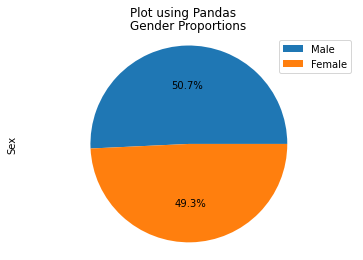

In [20]:
plt.figure(facecolor='white')
gender.plot(kind='pie', legend=True, autopct="%1.1f%%", title='Gender Proportions', labels=['',''])
plt.legend(loc = 'upper right', labels=gender.index)
plt.suptitle('Plot using Pandas')
plt.axis('equal')

(-1.1053783266922994,
 1.1002561107948714,
 -1.1062424936743749,
 1.1032653842934317)

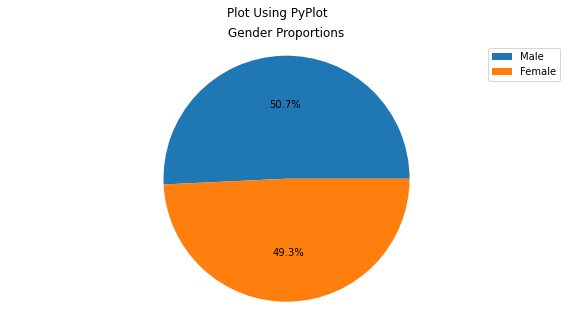

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(facecolor='white', figsize=(10, 5))
plt.pie(gender, autopct="%1.1f%%")
plt.title('Gender Proportions')
plt.legend(loc = 'upper right', labels=gender.index)
plt.suptitle('Plot Using PyPlot')
plt.axis('equal')

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
top4_regimen = clean_df.loc[(clean_df['Drug Regimen'] == 'Capomulin')|
    (clean_df['Drug Regimen'] == 'Ramicane')|
    (clean_df['Drug Regimen'] == 'Infubinol')|
    (clean_df['Drug Regimen']=='Ceftamin'),:]

In [23]:
# Start by getting the last (greatest) timepoint for each mouse
grp_mouse_id = clean_df.groupby('Mouse ID')
last_timepoint = grp_mouse_id['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
vol_last_timepoint = pd.merge(last_timepoint, clean_df, on=['Mouse ID', 'Timepoint'])
vol_last_timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Duplicated
0,a203,45,Infubinol,Female,20,23,67.973419,2,False
1,a251,45,Infubinol,Female,21,25,65.525743,1,False
2,a262,45,Placebo,Female,17,29,70.717621,4,False
3,a275,45,Ceftamin,Female,20,28,62.999356,3,False
4,a366,30,Stelasyn,Female,16,29,63.440686,1,False
...,...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0,False
245,z578,45,Ramicane,Male,11,16,30.638696,0,False
246,z581,45,Infubinol,Female,24,25,62.754451,3,False
247,z795,45,Naftisol,Female,13,29,65.741070,3,False


In [24]:
# Put treatments into a list for for loop (and later for plot labels)

regimen = top4_regimen['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []
outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in regimen:
    specific_reg_df = vol_last_timepoint.loc[vol_last_timepoint['Drug Regimen']==treatment, :]
    quantile = specific_reg_df['Tumor Volume (mm3)'].quantile([0.25, 0.75])
    l_quantile = quantile[0.25]
    u_quantile = quantile[0.75]
    iqr = u_quantile-l_quantile
    lower_bound = l_quantile - (1.5*iqr)
    upper_bound = u_quantile + (1.5*iqr)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = specific_reg_df['Tumor Volume (mm3)']
    # add subset 
    tumor_data.append(tumor_volume)

    # Determine outliers using upper and lower bounds
    out_val = specific_reg_df.loc[(specific_reg_df['Tumor Volume (mm3)']<lower_bound)|(specific_reg_df['Tumor Volume (mm3)']>upper_bound), ['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
    if len(out_val) > 0:
        outliers.append(out_val)
    

In [25]:
outliers

[   Mouse ID Drug Regimen  Tumor Volume (mm3)
 31     c326    Infubinol           36.321346]

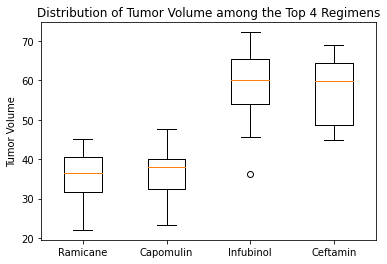

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_title('Distribution of Tumor Volume among the Top 4 Regimens')
ax.set_ylabel('Tumor Volume')
ax.boxplot(tumor_data)
tick_locations = [value for value in range(1, len(regimen)+1)]
plt.xticks(tick_locations, regimen)
plt.show()

## Line and Scatter Plots

In [87]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Randomly select one mouse from the data treated with Capomulin
rand_mouse = top4_regimen.loc[top4_regimen['Drug Regimen'] == 'Capomulin', 'Mouse ID'].sample(1)
rand_mouse = rand_mouse.reset_index(drop=True)
rand_mouse

0    m957
Name: Mouse ID, dtype: object

Text(0, 0.5, 'Tumor Volume (mm3)')

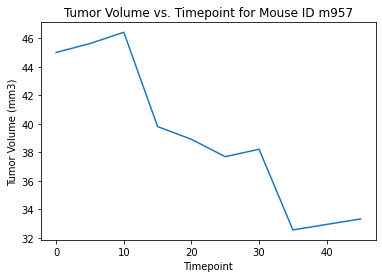

In [92]:
x_val = top4_regimen.loc[(top4_regimen['Drug Regimen'] == 'Capomulin') & (top4_regimen['Mouse ID'] == rand_mouse[0]), 'Timepoint']
y_val = top4_regimen.loc[(top4_regimen['Drug Regimen'] == 'Capomulin') & (top4_regimen['Mouse ID'] == rand_mouse[0]), 'Tumor Volume (mm3)']
plt.plot(x_val, y_val)
plt.title(f"Tumor Volume vs. Timepoint for Mouse ID {rand_mouse[0]}")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Average Tumor Volume')

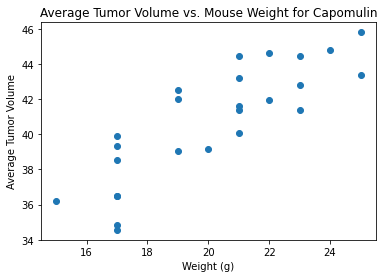

In [42]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_data = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', :]
grp_mouse_id = cap_data.groupby("Mouse ID")
avg_tumor_vol= grp_mouse_id['Tumor Volume (mm3)'].mean()
mouse_weight = grp_mouse_id['Weight (g)'].mean()

plt.scatter(mouse_weight, avg_tumor_vol)
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [47]:
# Correlation Coefficient
corr = round(st.pearsonr(mouse_weight, avg_tumor_vol)[0], 2)
print(f"The correlation between mouse weight and average tumor volume is {corr}.")

The correlation between mouse weight and average tumor volume is 0.84.


Text(0, 0.5, 'Average Tumor Volume (mm3)')

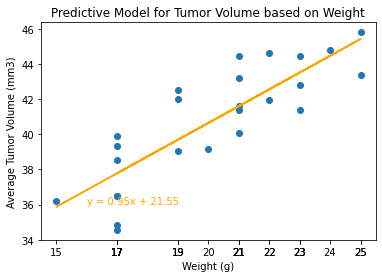

In [53]:
# Linear regression model
(slope, intercept, rvalue, pvalue, std_error) = st.linregress(mouse_weight, avg_tumor_vol)
# Model
pred_avg_tumor_vol = slope*mouse_weight + intercept
str_model = 'y = '+str(round(slope, 2))+'x + '+str(round(intercept, 2))
# Scatter Plot
plt.scatter(mouse_weight, avg_tumor_vol)
plt.plot(mouse_weight, pred_avg_tumor_vol, color='orange')
plt.annotate(str_model, (16,36), color='orange')
plt.xticks(mouse_weight)
plt.title("Predictive Model for Tumor Volume based on Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
